# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [230]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [231]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("newskey_api")
type(api_key)

str

In [232]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [233]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

Total articles about Bitcoin: 4450


In [234]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")


print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")


Total articles about Ethereum: 1223


In [235]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiments)  

cols = ["compound", "negative", "neutral", "positive", "text"]

bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [236]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)  

cols = ["compound", "negative", "neutral", "positive", "text"]

ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [237]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.135189,0.025737,0.913737,0.060526
std,0.379635,0.066192,0.098593,0.065557
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.000000,0.000000,0.950000,0.050000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.215000,1.000000,0.174000


In [238]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.151905,0.016800,0.921600,0.061600
std,0.322903,0.052501,0.103898,0.078815
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.881500,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.406800,0.000000,1.000000,0.095250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a higher positive mean score than bitcoin.

Q: Which coin had the highest compound score?

A: Ethereum had a higher compound score than bitcoin.

Q. Which coin had the highest positive score?

A: Ethereum had a higher positive score than bitcoin.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [239]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [240]:
lemmatizer = WordNetLemmatizer()

In [241]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
import string

In [288]:
# Complete the tokenizer function 
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))

    #Added custom Stop Words because they were the most common Ngrams and are most likley referreing to a photo
    sw_addon = {"file", "photo"}

    regex = re.compile("[^a-zA-Z ]")

    re_clean = regex.sub(' ', text)

    words = word_tokenize(re_clean)

    lem = [lemmatizer.lemmatize(word) for word in words]

    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]

    return output


In [289]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newly, announced, support, ..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, two, month, ra..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [290]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newly, announced, support, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currencies, ethereu..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investors,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [291]:
from collections import Counter
from nltk import ngrams

In [292]:
processed_txt = bitcoin_df.tokens

In [293]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_ngrams = [item for sublist in bitcoin_df["tokens"].to_list() for item in sublist]
btc_bigrams = Counter(ngrams(bitcoin_ngrams, n=2))
btc_bigrams.most_common(20)

[(('virtual', 'currency'), 6),
 (('reuters', 'dado'), 5),
 (('dado', 'ruvic'), 5),
 (('currency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('ruvic', 'illustration'), 4),
 (('london', 'reuters'), 4),
 (('representations', 'virtual'), 3),
 (('chars', 'reuters'), 3),
 (('reuters', 'staff'), 3),
 (('illustration', 'london'), 3),
 (('reuters', 'chars'), 3),
 (('former', 'microsoft'), 2),
 (('microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'ukraine'), 2),
 (('ukraine', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'years'), 2),
 (('years', 'prison'), 2)]

In [294]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_ngrams = [item for sublist in ethereum_df["tokens"].to_list() for item in sublist]
ethereum_bigrams = Counter(ngrams(ethereum_ngrams, n=2))
ethereum_bigrams.most_common(20)

[(('virtual', 'currency'), 9),
 (('reuters', 'dado'), 8),
 (('dado', 'ruvic'), 8),
 (('ruvic', 'illustration'), 8),
 (('chars', 'reuters'), 6),
 (('reuters', 'staff'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('london', 'reuters'), 5),
 (('new', 'york'), 5),
 (('staff', 'representation'), 5),
 (('representation', 'virtual'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', 'reuters'), 5),
 (('illustration', 'london'), 4),
 (('york', 'reuters'), 4),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3)]

In [248]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [299]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top10_words = token_count(bitcoin_ngrams)
bitcoin_top10_words

[('chars', 19),
 ('bitcoin', 13),
 ('reuters', 13),
 ('illustration', 9),
 ('currency', 7),
 ('virtual', 6),
 ('cryptocurrency', 5),
 ('taken', 5),
 ('dado', 5),
 ('ruvic', 5)]

In [301]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top10_words = token_count(ethereum_ngrams)
ethereum_top10_words

[('reuters', 23),
 ('chars', 20),
 ('illustration', 16),
 ('bitcoin', 13),
 ('virtual', 9),
 ('currency', 9),
 ('representation', 8),
 ('dado', 8),
 ('ruvic', 8),
 ('seen', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [317]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [318]:
# def process_text(doc):
#     sw = set(stopwords.words('english'))
#     sw_addon = {"file", "photo"}
#     regex = re.compile("[^a-zA-Z ]")
#     re_clean = regex.sub('', doc)
#     words = word_tokenize(re_clean)
#     lem = [lemmatizer.lemmatize(word) for word in words]
#     output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
#     return ' '.join(output)

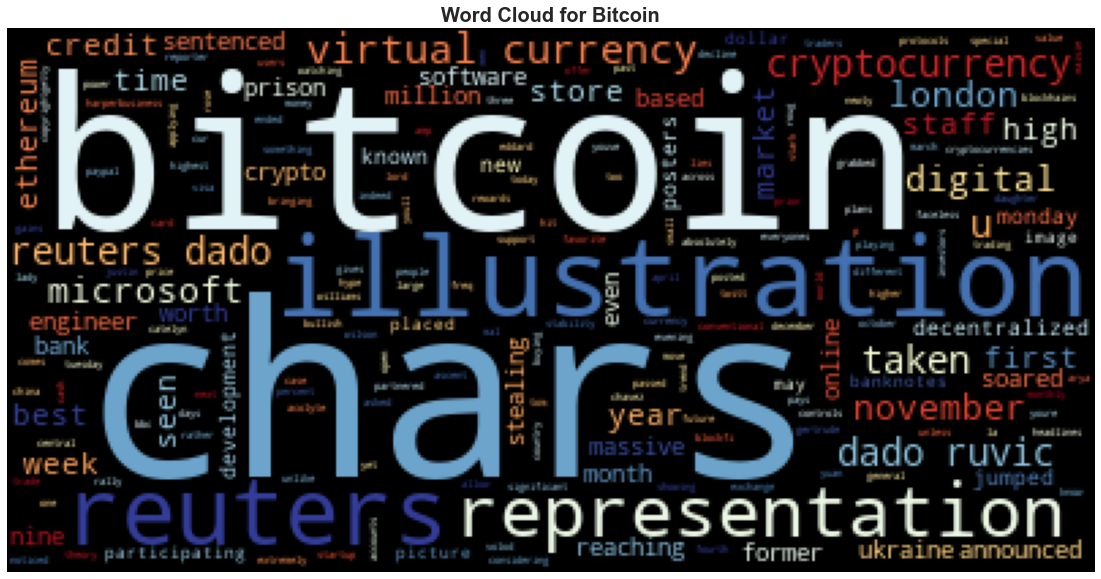

In [329]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(bitcoin_ngrams))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Word Cloud for Bitcoin", fontdict=fontdict)
plt.show()

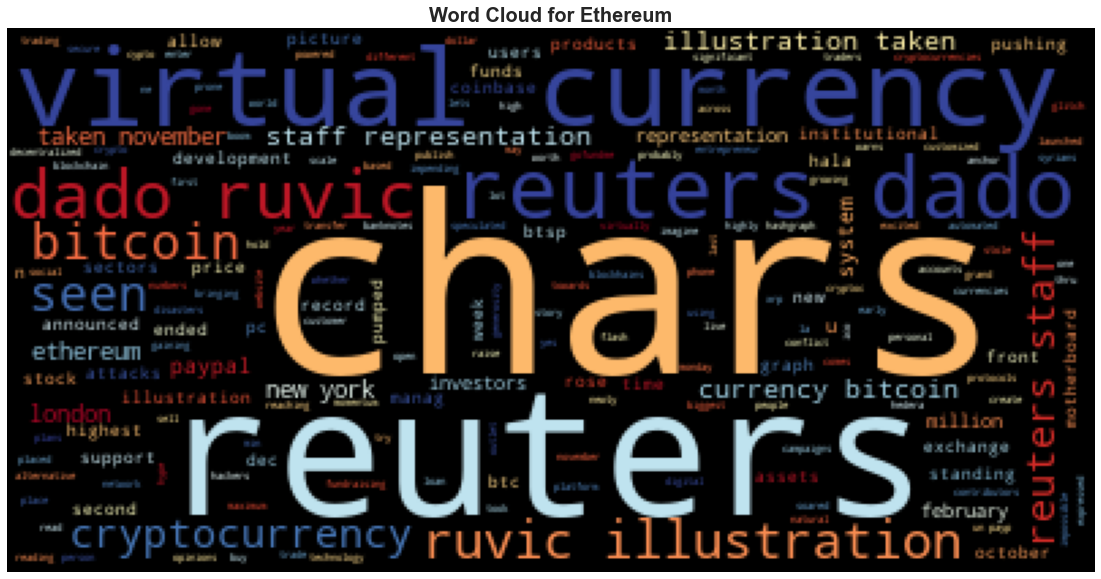

In [330]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(ethereum_ngrams))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Word Cloud for Ethereum", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [254]:
import spacy
from spacy import displacy

In [255]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [256]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [257]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [258]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [259]:
# Render the visualization
# YOUR CODE HERE!

In [260]:
# List all Entities
# YOUR CODE HERE!

---

## Ethereum NER

In [261]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [262]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [263]:
# Render the visualization
# YOUR CODE HERE!

In [264]:
# List all Entities
# YOUR CODE HERE!